In [1]:
import numpy as np
import matplotlib.pyplot as plt



## Sampling statistics

Sampling statistics follow a hypergeometric distribution.

distribution parameters:
- Population size (N)
- Number in the demographic of interest (M)
- sample size (n)

other parameters: 
- sample ratio: n/N
- fraction in demographic of interest: M/N

measurements:
- number in demographic in sample (Hypergeometric): mu = nM/N, sample_dem_pop
- standard error (sqrt variance) on mu: se_mu = sqrt((N-n)/(N-1) * (nM/N) * (1-M/N)), sample_dem_pop_se

census reported values:
- sample ratio: (1/6)
- population size: = n / sample ratio = N
- number in demographic of interest: mu / sample ratio = M, census_dem_pop
- standard error on M: se_M = se_mu / sample_ratio, census_dem_pop_se
- fraction of demographic of interest (fraction): mu / n = M/N, sample_fraction
- standard error on demographic fraction: se_fraction = sqrt((1/n) * (N-n)/(N-1) * fraction * (1-fraction))

In [2]:
census_sample_ratio = 1/6.

In [3]:
census_pop = 500
census_dem_pop = 50

In [4]:
sample_dem_pop = census_dem_pop * census_sample_ratio
sample_dem_pop_se = np.sqrt(
    (census_pop - census_pop * census_sample_ratio)/(census_pop-1)
    * (census_dem_pop*census_sample_ratio)
    * (1-census_dem_pop/census_pop)
)

In [5]:
print(sample_dem_pop)
print(sample_dem_pop_se)

8.333333333333332
2.502503756260957


In [6]:
census_dem_pop_se = sample_dem_pop_se / census_sample_ratio
census_dem_pop_se

15.015022537565741

In [7]:
sample_fraction = census_dem_pop / census_pop
sample_fraction_se = np.sqrt(
    1/(census_sample_ratio*census_pop)
    * (census_pop - census_pop * census_sample_ratio)/(census_pop-1)
    * sample_fraction
    * (1-sample_fraction)
)
print(sample_fraction)
print(sample_fraction_se)

0.1
0.030030045075131486


In [8]:
def fraction_standard_error(fraction, population, sample_rate=1/6):
    return np.sqrt(
        1/(sample_rate * population)
        * (population - population * sample_rate)/(population-1)
        * fraction
        * (1-fraction)
    )

In [9]:
fraction_standard_error(0.1, 500)

0.030030045075131486

In [10]:
fraction_standard_error(0.02, 500)

0.01401402103506136

In [11]:
fraction_standard_error(0.001, 500)

0.0031638615709414595

In [12]:
def percent_standard_error(percent, population, sample_rate=1/6):
    return 100*fraction_standard_error(percent/100., population, sample_rate)

In [13]:
percent_standard_error(10, 500)

3.0030045075131486

In [14]:
percent_standard_error(2, 500)

1.401402103506136

In [15]:
percent_standard_error(1, 500)

0.9959839195167117

In [16]:
percent_standard_error(.1, 500)

0.31638615709414597

In [17]:
percent_standard_error(2, 5000)

0.4427631509527056

In [18]:
percent_standard_error(10, 5000)

0.9487781806129407

## Propagate error for P(Gi=g|Ri=r)

P(Gi=g|Ri=r) = P(Ri=r|Gi=g) * P(Gi=g) / sum_on_g'(P(Ri=r|Gi=g') * P(Gi=g'))

P(Gi=g) = n_gi / sum_on_gi(n_gi) = n_gi / n_total

P(Ri=r|Gi=g) = n_rigi / sun_on_ri(n_rigi) = n_rigi / n_gi

This is distributed hypergeometrically with the population given by the number in that geolocation.

P(Ri=r|Gi=g) * P(Gi=g) = (n_rigi / n_gi) * (n_gi / n_total) = n_rigi / n_total

sum_on_g'(P(Ri=r|Gi=g') * n_rigi) = sum_on_g'(n_rigi / n_total) = n_ri / n_total

P(Gi=g|Ri=r) = P(Ri=r|Gi=g) * n_rigi / sum_on_g'(P(Ri=r|Gi=g') * n_rigi) = n_rigi / n_ri

So this is distributed hypergeometrically, but with the population given by n_ri (total across all locations in that racial group).



In [19]:
n_geo = 50000
pop_per_geo = 1000

minority_fraction = 0.1
majority_fraction = 1 - minority_fraction
minority_total = minority_fraction * pop_per_geo * n_geo
majority_total = majority_fraction * pop_per_geo * n_geo

minority_pop_geo = minority_fraction * pop_per_geo
majority_pop_geo = majority_fraction * pop_per_geo


print("Probability of R given G minority", minority_fraction)
standard_error_Pr_g_minority = fraction_standard_error(minority_fraction, pop_per_geo)
print("SE on P of R given G minority", standard_error_Pr_g_minority)

Pg_r_minority = minority_fraction * pop_per_geo / minority_total
print("Probability of G given R minority", Pg_r_minority)
assert Pg_r_minority == minority_pop_geo / minority_total
standard_error_Pg_r_minority = fraction_standard_error(Pg_r_minority, minority_total)
print("SE on P of G given R minority", standard_error_Pg_r_minority)

print("")

print("Probability of R given G majority", majority_fraction)
standard_error_Pr_g_majority = fraction_standard_error(majority_fraction, pop_per_geo)
print("SE on P of R given G majority", standard_error_Pr_g_majority)


Pg_r_majority = majority_fraction * pop_per_geo / majority_total
print("Probability of G given R majority", Pg_r_majority)
assert Pg_r_majority == majority_pop_geo / majority_total
standard_error_Pg_r_majority = fraction_standard_error(Pg_r_majority, majority_total)
print("SE on P of G given R majority", standard_error_Pg_r_majority)



Probability of R given G minority 0.1
SE on P of R given G minority 0.021223817998900444
Probability of G given R minority 2e-05
SE on P of G given R minority 4.472091680625611e-06

Probability of R given G majority 0.9
SE on P of R given G majority 0.02122381799890044
Probability of G given R majority 2e-05
SE on P of G given R majority 1.4906970943687747e-06


## Propagate error for P(Ri=r|Gi=g, Si=s)

P(Ri=r|Gi=g, Si=s) = P(Gi=g|Ri=r) * P(Ri=r|Si=s) / sum_on_r'(P(Gi=g|Ri=r') * P(Ri=r'|Si=s))

from above:

P(Gi=g|Ri=r) = n_rigi / n_ri

P(Ri=r|Si=s) = n_risi / sun_on_ri(n_risi) = n_risi / n_si


P(Gi=g|Ri=r) * P(Ri=r|Si=s) = n_rigi * n_risi / (n_ri * n_si)


sum_on_r'(P(Gi=g|Ri=r') * P(Ri=r'|Si=s)) = n_si * sum_on_r'(n_rigi * n_risi / n_ri)


P(Ri=r|Gi=g, Si=s) = n_rigi * n_risi / (n_ri * sum_on_r'(n_rigi * n_risi / n_ri))

In [20]:
census_total = 5e7

n_geo = 50000
pop_per_geo = 1000
assert census_total == n_geo * pop_per_geo

n_surname = 500000
pop_per_surname = 100
assert census_total == n_surname * pop_per_surname

minority_fraction = 0.1
majority_fraction = 1 - minority_fraction

print("Probability of R given S minority", minority_fraction)
standard_error_Pr_s_minority = fraction_standard_error(minority_fraction, pop_per_surname)
print("SE on P of R given S minority", standard_error_Pr_s_minority)

print("Probability of R given S majority", majority_fraction)
standard_error_Pr_s_majority = fraction_standard_error(majority_fraction, pop_per_surname)
print("SE on P of R given S majority", standard_error_Pr_s_majority)

print("")

sum_Pg_r_Pr_s = (Pg_r_minority*minority_fraction + Pg_r_majority*majority_fraction)
P_bisg_minority = Pg_r_minority * minority_fraction / sum_Pg_r_Pr_s

P_bisg_majority = Pg_r_majority * majority_fraction / sum_Pg_r_Pr_s

standard_error_Pg_r_Pr_s_minority = Pg_r_minority * minority_fraction * np.sqrt(
    (standard_error_Pg_r_minority/Pg_r_minority)**2 + (standard_error_Pr_s_minority/minority_fraction)**2)
standard_error_Pg_r_Pr_s_majority = Pg_r_majority * majority_fraction * np.sqrt(
    (standard_error_Pg_r_majority/Pg_r_majority)**2 + (standard_error_Pr_s_majority/majority_fraction)**2)

standard_error_sum_Pg_r_Pr_s = np.sqrt(
    standard_error_Pg_r_Pr_s_minority**2 + standard_error_Pg_r_Pr_s_minority**2
)

standard_error_BISG_minority = P_bisg_minority * np.sqrt(
    (standard_error_Pg_r_Pr_s_minority/(Pg_r_minority*minority_fraction))**2
    + (standard_error_sum_Pg_r_Pr_s/(sum_Pg_r_Pr_s))**2
)

standard_error_BISG_majority = P_bisg_majority * np.sqrt(
    (standard_error_Pg_r_Pr_s_majority/(Pg_r_majority*majority_fraction))**2
    + (standard_error_sum_Pg_r_Pr_s/(sum_Pg_r_Pr_s))**2
)

print("BISG Probability minority", P_bisg_minority)
print("SE on BISG minority", standard_error_BISG_minority)

print("")
print("BISG Probability majority", P_bisg_majority)
print("SE on BISG majority", standard_error_BISG_majority)


Probability of R given S minority 0.1
SE on P of R given S minority 0.06741998624632423
Probability of R given S majority 0.9
SE on P of R given S majority 0.06741998624632423

BISG Probability minority 0.1
SE on BISG minority 0.07173808987115297

BISG Probability majority 0.8999999999999999
SE on BISG majority 0.13122113004804412


## Monte Carlo simulations

numpy's hypergeometric random number generator wants:
- ngood = M
- nbad = N-M
- nsample = n

In [21]:
rng = np.random.default_rng()
ntrials = 10000000

sample_g_r_minority = rng.hypergeometric(
    minority_fraction * pop_per_geo,
    minority_fraction * (census_total - pop_per_geo),
    minority_total*census_sample_ratio,
    ntrials
)

Pg_r_minority_dist = sample_g_r_minority / (minority_total*census_sample_ratio)


sample_r_s_minority = rng.hypergeometric(
    minority_fraction * pop_per_surname,
    pop_per_surname-minority_fraction * pop_per_surname,
    pop_per_surname*census_sample_ratio,
    ntrials
)

Pr_s_minority_dist =  sample_r_s_minority / (pop_per_surname*census_sample_ratio)

sample_g_r_majority = rng.hypergeometric(
    majority_fraction * pop_per_geo,
    majority_fraction * (census_total - pop_per_geo),
    majority_total*census_sample_ratio,
    ntrials
)

Pg_r_majority_dist =  sample_g_r_majority / (majority_total*census_sample_ratio)

#sample_g_r_majority2 = (
#    np.ones(ntrials) * pop_per_geo*census_sample_ratio - sample_g_r_minority
#)
#Pg_r_majority_dist2 =  sample_g_r_majority2 / (majority_total*census_sample_ratio)


sample_r_s_majority = rng.hypergeometric(
    majority_fraction * pop_per_surname,
    pop_per_surname-majority_fraction * pop_per_surname,
    pop_per_surname*census_sample_ratio,
    ntrials
) 

Pr_s_majority_dist = sample_r_s_majority / (pop_per_surname*census_sample_ratio)
sample_r_s_majority2 = (
    np.ones(ntrials) * pop_per_surname*census_sample_ratio - sample_r_s_minority
)
Pr_s_majority_dist2 = sample_r_s_majority2 / (pop_per_surname*census_sample_ratio)

sample_r_s_totals = sample_r_s_minority + sample_r_s_majority




sum_Pg_r_Pr_s_dist = (Pg_r_minority_dist*Pr_s_minority_dist + Pg_r_majority_dist*Pr_s_majority_dist)
P_bisg_minority_dist = Pg_r_minority_dist * Pr_s_minority_dist / sum_Pg_r_Pr_s

P_bisg_majority_dist = Pg_r_majority_dist * Pr_s_majority_dist / sum_Pg_r_Pr_s



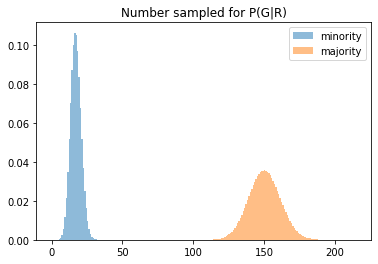

In [53]:
max_val = int(np.round(np.max([sample_g_r_minority, sample_g_r_majority])))
bins = np.linspace(0,max_val,max_val+1)

count, bins, ignored = plt.hist(sample_g_r_minority, bins, density=True, alpha=0.5, label="minority")
count, bins, ignored = plt.hist(sample_g_r_majority, bins, density=True, alpha=0.5, label="majority")
plt.title("Number sampled for P(G|R)")

plt.legend()

filename = "bisg_num_sampled_g_r.pdf"
#plt.show()
plt.savefig(filename)

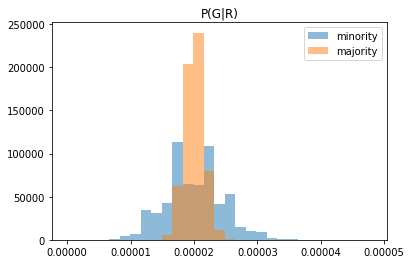

In [60]:
max_val = np.max([Pg_r_minority_dist, Pg_r_majority_dist])
bins = np.linspace(0,max_val,30)

count, bins, ignored = plt.hist(Pg_r_minority_dist, bins, density=True, alpha=0.5, label="minority")
count, bins, ignored = plt.hist(Pg_r_majority_dist, bins, density=True, alpha=0.5, label="majority")
plt.title("P(G|R)")

plt.legend()

filename = "bisg_prob_g_r.pdf"
#plt.show()
plt.savefig(filename)

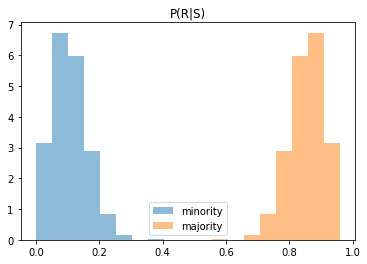

In [55]:
max_val = np.max([Pr_s_minority_dist, Pr_s_majority_dist])
bins = np.linspace(0,max_val,20)

count, bins, ignored = plt.hist(Pr_s_minority_dist, bins, density=True, alpha=0.5, label="minority")
count, bins, ignored = plt.hist(Pr_s_majority_dist, bins, density=True, alpha=0.5, label="majority")
plt.title("P(R|S)")

plt.legend()

filename = "bisg_prob_r_s.pdf"
#plt.show()
plt.savefig(filename)

minority mean: propagated:  2.0e-06 simulated:  1.9e-06
minority std: propagated:  1.4e-06 simulated:  1.4e-06

majority mean: propagated:  1.8e-05 simulated:  1.7e-05
majority std: propagated:  1.9e-06 simulated:  1.9e-06


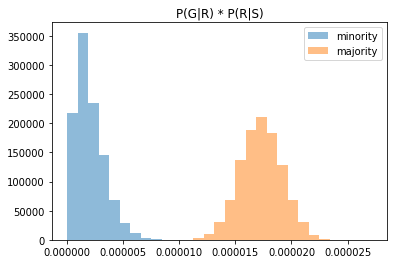

In [56]:
max_val = np.max([Pg_r_minority_dist * Pr_s_minority_dist, Pg_r_majority_dist * Pr_s_majority_dist])
bins = np.linspace(0,max_val,30)

count, bins, ignored = plt.hist(Pg_r_minority_dist * Pr_s_minority_dist, bins, density=True, alpha=0.5, label="minority")
count, bins, ignored = plt.hist(Pg_r_majority_dist * Pr_s_majority_dist, bins, density=True, alpha=0.5, label="majority")

plt.title("P(G|R) * P(R|S)")

plt.legend()

filename = "bisg_prob_g_r_prob_r_s.pdf"
#plt.show()
plt.savefig(filename)

print("minority mean: propagated: ", '{:0.1e}'.format(Pg_r_minority * minority_fraction),
      "simulated: ", '{:0.1e}'.format(np.mean(Pg_r_minority_dist * Pr_s_minority_dist))
)
print("minority std: propagated: ", '{:0.1e}'.format(standard_error_Pg_r_Pr_s_minority),
      "simulated: ", '{:0.1e}'.format(np.std(Pg_r_minority_dist * Pr_s_minority_dist))
)

print("")
print("majority mean: propagated: ", '{:0.1e}'.format(Pg_r_majority * majority_fraction),
      "simulated: ", '{:0.1e}'.format(np.mean(Pg_r_majority_dist * Pr_s_majority_dist))
)
print("majority std: propagated: ", '{:0.1e}'.format(standard_error_Pg_r_Pr_s_majority),
      "simulated: ", '{:0.1e}'.format(np.std(Pg_r_majority_dist * Pr_s_majority_dist))
)


mean propagated:  2.0e-05 simulated:  1.9e-05
std propagated:  2.0e-06 simulated:  2.3e-06


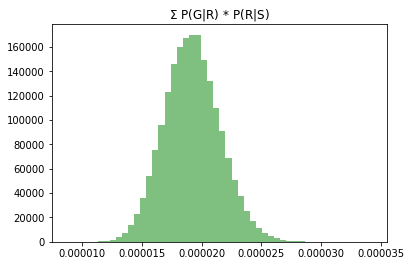

In [57]:
count, bins, ignored = plt.hist(sum_Pg_r_Pr_s_dist, 50, density=True, color='g', alpha=0.5)
plt.title("P(R|S)")
plt.title("$\Sigma$ P(G|R) * P(R|S)")

filename = "bisg_sum_prob_g_r_prob_r_s.pdf"
#plt.show()
plt.savefig(filename)


print("mean propagated: ", '{:0.1e}'.format(sum_Pg_r_Pr_s),
      "simulated: ", '{:0.1e}'.format(np.mean(sum_Pg_r_Pr_s_dist))
)
print("std propagated: ", '{:0.1e}'.format(standard_error_sum_Pg_r_Pr_s),
      "simulated: ", '{:0.1e}'.format(np.std(sum_Pg_r_Pr_s_dist))
)

minority mean: propagated:  1.0e-01 simulated:  9.6e-02
minority std: propagated:  7.2e-02 simulated:  7.1e-02

majority mean: propagated:  9.0e-01 simulated:  1.7e-05
majority std: propagated:  1.9e-06 simulated:  1.9e-06


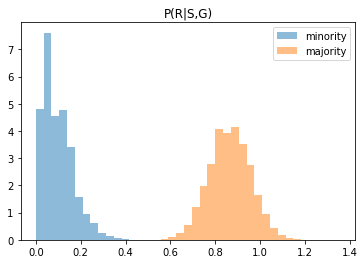

In [58]:
max_val = np.max([P_bisg_minority_dist, P_bisg_majority_dist])
bins = np.linspace(0,max_val,40)

count, bins, ignored = plt.hist(P_bisg_minority_dist, bins, density=True, alpha=0.5, label="minority")
count, bins, ignored = plt.hist(P_bisg_majority_dist, bins, density=True, alpha=0.5, label="majority")

plt.title("P(R|S,G)")

plt.legend()

filename = "bisg_prob_r_sg.pdf"
#plt.show()
plt.savefig(filename)


print("minority mean: propagated: ", '{:0.1e}'.format(P_bisg_minority),
      "simulated: ", '{:0.1e}'.format(np.mean(P_bisg_minority_dist))
)
print("minority std: propagated: ", '{:0.1e}'.format(standard_error_BISG_minority),
      "simulated: ", '{:0.1e}'.format(np.std(P_bisg_minority_dist))
)

print("")

print("majority mean: propagated: ", '{:0.1e}'.format(P_bisg_majority),
      "simulated: ", '{:0.1e}'.format(np.mean(Pg_r_majority_dist * Pr_s_majority_dist))
)
print("majority std: propagated: ", '{:0.1e}'.format(standard_error_Pg_r_Pr_s_majority),
      "simulated: ", '{:0.1e}'.format(np.std(Pg_r_majority_dist * Pr_s_majority_dist))
)